In [22]:
import pandas as pd
import os

# Ganti path jika Anda memindahkan file
base_path = 'E:\\BACKUP DRIVE D\\Kerjaan\\AI Engineering\\ScoreSeer'
file_path = os.path.join(base_path, 'data', 'raw', 'matches_full.csv')
df = pd.read_csv(file_path)

# Menampilkan beberapa baris pertama dari DataFrame
print(df.head())

# Menampilkan informasi umum tentang DataFrame, termasuk tipe data kolom
print(df.info())

   Unnamed: 0        date   time     comp        round  day venue result   gf  \
0           0  2024-08-17  21:30  La Liga  Matchweek 1  Sat  Away      W  2.0   
1           1  2024-08-24  19:00  La Liga  Matchweek 2  Sat  Home      W  2.0   
2           2  2024-08-27  21:30  La Liga  Matchweek 3  Tue  Away      W  2.0   
3           3  2024-08-31  17:00  La Liga  Matchweek 4  Sat  Home      W  7.0   
4           4  2024-09-15  16:15  La Liga  Matchweek 5  Sun  Away      W  4.0   

    ga  ...  match report  notes    sh   sot  dist   fk pk pkatt season  \
0  1.0  ...  Match Report    NaN  17.0   5.0  18.6  1.0  1     1   2025   
1  1.0  ...  Match Report    NaN  13.0   5.0  16.6  0.0  0     0   2025   
2  1.0  ...  Match Report    NaN  22.0   5.0  19.3  1.0  0     0   2025   
3  0.0  ...  Match Report    NaN  23.0  11.0  13.7  1.0  0     0   2025   
4  1.0  ...  Match Report    NaN  20.0   9.0  19.1  0.0  0     0   2025   

        team  
0  Barcelona  
1  Barcelona  
2  Barcelona  
3 

In [23]:
df['date'] = pd.to_datetime(df['date'])

# Gabungkan kolom date dan time menjadi satu kolom datetime
df['datetime'] = df['date'].dt.date.astype(str) + ' ' + df['time']
df['datetime'] = pd.to_datetime(df['datetime'])

# Hapus kolom date dan time yang asli jika sudah tidak diperlukan
df = df.drop(columns=['date', 'time'])

print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4318 entries, 0 to 4317
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Unnamed: 0     4318 non-null   int64         
 1   comp           4318 non-null   object        
 2   round          4318 non-null   object        
 3   day            4318 non-null   object        
 4   venue          4318 non-null   object        
 5   result         4318 non-null   object        
 6   gf             4318 non-null   float64       
 7   ga             4318 non-null   float64       
 8   opponent       4318 non-null   object        
 9   xg             4318 non-null   float64       
 10  xga            4318 non-null   float64       
 11  poss           4318 non-null   float64       
 12  attendance     3344 non-null   float64       
 13  captain        4318 non-null   object        
 14  formation      4318 non-null   object        
 15  opp formation  4318 n

In [24]:
df['target'] = (df['result'] == 'W').astype(int)

# Menampilkan distribusi target
print(df['target'].value_counts())

# Menampilkan beberapa baris dengan kolom target baru
print(df[['result', 'target']].head())

target
0    2752
1    1566
Name: count, dtype: int64
  result  target
0      W       1
1      W       1
2      W       1
3      W       1
4      W       1


In [25]:
# Identifikasi kolom kategorikal yang perlu di-encode
categorical_cols = ['comp', 'round', 'day', 'venue', 'opponent', 'captain', 'formation', 'opp formation', 'referee', 'team']

# Lakukan One-Hot Encoding
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Menampilkan informasi umum DataFrame setelah encoding
print(df.info())

# Menampilkan beberapa baris pertama untuk melihat kolom baru
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4318 entries, 0 to 4317
Columns: 410 entries, Unnamed: 0 to team_Villarreal
dtypes: bool(391), datetime64[ns](1), float64(11), int32(1), int64(4), object(2)
memory usage: 2.2+ MB
None
   Unnamed: 0 result   gf   ga   xg  xga  poss  attendance  match report  \
0           0      W  2.0  1.0  3.2  1.0  63.0     46673.0  Match Report   
1           1      W  2.0  1.0  1.8  1.0  64.0     46448.0  Match Report   
2           2      W  2.0  1.0  1.4  0.4  64.0     14031.0  Match Report   
3           3      W  7.0  0.0  4.7  0.5  70.0     44359.0  Match Report   
4           4      W  4.0  1.0  1.9  1.3  55.0     13891.0  Match Report   

   notes  ...  team_Mallorca  team_Osasuna  team_Rayo Vallecano  \
0    NaN  ...          False         False                False   
1    NaN  ...          False         False                False   
2    NaN  ...          False         False                False   
3    NaN  ...          False         Fals

In [26]:
# Periksa nilai yang hilang di setiap kolom
missing_values = df.isnull().sum()
print("Nilai yang hilang per kolom:\n", missing_values[missing_values > 0])

# Contoh penanganan: mengisi kolom numerik 'attendance' dengan median
# (Anda bisa menyesuaikan ini berdasarkan analisis lebih lanjut)
if 'attendance' in df.columns and df['attendance'].isnull().any():
    df['attendance'] = df['attendance'].fillna(df['attendance'].median())

# Kolom 'notes' dan 'match report' kemungkinan besar tidak relevan untuk model prediksi
# dan memiliki banyak nilai NaN, jadi kita bisa menghapusnya.
df = df.drop(columns=['notes', 'match report'], errors='ignore')

print(df.info())

Nilai yang hilang per kolom:
 attendance     974
notes         4318
dist             3
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4318 entries, 0 to 4317
Columns: 408 entries, Unnamed: 0 to team_Villarreal
dtypes: bool(391), datetime64[ns](1), float64(10), int32(1), int64(4), object(1)
memory usage: 2.2+ MB
None


In [27]:

# Definisikan fitur (X) dan target (y)
X = df.drop(columns=['result', 'target', 'datetime'])
y = df['target']

# Pastikan semua kolom di X adalah numerik
# Hapus kolom non-numerik yang mungkin tersisa (misalnya, jika ada kolom object lain yang tidak di-encode)
non_numeric_cols = X.select_dtypes(include=['object']).columns
if len(non_numeric_cols) > 0:
    print(f"Menghapus kolom non-numerik yang tersisa: {list(non_numeric_cols)}")
    X = X.drop(columns=non_numeric_cols)

print("Bentuk X:", X.shape)
print("Bentuk y:", y.shape)
print("Kolom yang digunakan sebagai fitur:", X.columns.tolist())

Bentuk X: (4318, 405)
Bentuk y: (4318,)
Kolom yang digunakan sebagai fitur: ['Unnamed: 0', 'gf', 'ga', 'xg', 'xga', 'poss', 'attendance', 'sh', 'sot', 'dist', 'fk', 'pk', 'pkatt', 'season', 'round_Matchweek 10', 'round_Matchweek 11', 'round_Matchweek 12', 'round_Matchweek 13', 'round_Matchweek 14', 'round_Matchweek 15', 'round_Matchweek 16', 'round_Matchweek 17', 'round_Matchweek 18', 'round_Matchweek 19', 'round_Matchweek 2', 'round_Matchweek 20', 'round_Matchweek 21', 'round_Matchweek 22', 'round_Matchweek 23', 'round_Matchweek 24', 'round_Matchweek 25', 'round_Matchweek 26', 'round_Matchweek 27', 'round_Matchweek 28', 'round_Matchweek 29', 'round_Matchweek 3', 'round_Matchweek 30', 'round_Matchweek 31', 'round_Matchweek 32', 'round_Matchweek 33', 'round_Matchweek 34', 'round_Matchweek 35', 'round_Matchweek 36', 'round_Matchweek 37', 'round_Matchweek 38', 'round_Matchweek 4', 'round_Matchweek 5', 'round_Matchweek 6', 'round_Matchweek 7', 'round_Matchweek 8', 'round_Matchweek 9', 'day

In [28]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (3454, 405)
X_test shape: (864, 405)
y_train shape: (3454,)
y_test shape: (864,)


In [29]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForestClassifier model
model = RandomForestClassifier(n_estimators=100, min_samples_split=10, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
preds = model.predict(X_test)

print("Model training complete and predictions made.")

Model training complete and predictions made.


In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import numpy as np

# Calculate accuracy
accuracy = accuracy_score(y_test, preds)
print(f"Accuracy: {accuracy:.4f}")

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, preds)
recall = recall_score(y_test, preds)
f1 = f1_score(y_test, preds)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, preds))

# Display confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, preds))

# Combine actual and predicted values for further analysis (optional)
combined = pd.DataFrame(dict(actual=y_test, prediction=preds))
print("\nCombined actual vs. prediction (first 5 rows):")
print(combined.head())

Accuracy: 0.9606
Precision: 0.9416
Recall: 0.9477
F1-Score: 0.9446

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       558
           1       0.94      0.95      0.94       306

    accuracy                           0.96       864
   macro avg       0.96      0.96      0.96       864
weighted avg       0.96      0.96      0.96       864


Confusion Matrix:
[[540  18]
 [ 16 290]]

Combined actual vs. prediction (first 5 rows):
      actual  prediction
314        1           1
3704       1           1
731        0           0
151        0           0
109        0           0


In [31]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Ganti path jika Anda memindahkan file
base_path = 'E:\\BACKUP DRIVE D\\Kerjaan\\AI Engineering\\ScoreSeer'
file_path = os.path.join(base_path, 'data', 'raw', 'matches_full.csv')
df = pd.read_csv(file_path)

# Menampilkan beberapa baris pertama dari DataFrame
print(df.head())

# Menampilkan informasi umum tentang DataFrame, termasuk tipe data kolom
print(df.info())

# Convert 'date' column to datetime objects
df['date'] = pd.to_datetime(df['date'])

# Gabungkan kolom date dan time menjadi satu kolom datetime
df['datetime'] = df['date'].dt.date.astype(str) + ' ' + df['time']
df['datetime'] = pd.to_datetime(df['datetime'])

# Hapus kolom date dan time yang asli jika sudah tidak diperlukan
df = df.drop(columns=['date', 'time'])

print(df.info())
print(df.head())

# Create a numerical 'target' column
df['target'] = (df['result'] == 'W').astype(int)

# Display distribution of the new 'target' column
print(df['target'].value_counts())

# Display some rows with the new 'target' column
print(df[['result', 'target']].head())

# Handle missing values
# Check for NaNs
print("Missing values before handling:")
print(df.isnull().sum())

# Fill 'attendance' with its median
df['attendance'] = df['attendance'].fillna(df['attendance'].median())

# Drop 'notes' and 'match report' columns
df = df.drop(columns=['notes', 'match report'])

print("Missing values after handling:")
print(df.isnull().sum())

# Sort by team and datetime to ensure correct rolling average calculation
df = df.sort_values(by=['team', 'datetime'])

# Define columns for rolling averages
rolling_cols = ['gf', 'ga', 'sh', 'sot', 'dist', 'fk', 'pk', 'pkatt', 'xg', 'xga', 'poss']

# Function to calculate rolling averages
def rolling_averages(group, cols, new_cols):
    group = group.sort_values('datetime')
    rolling_stats = group[cols].rolling(3, closed='left').mean()
    group[new_cols] = rolling_stats
    return group

# Create new column names for rolling averages
new_cols = [f'{col}_roll' for col in rolling_cols]

# Apply the rolling averages function to each team
df_rolling = df.groupby('team', group_keys=False).apply(lambda x: rolling_averages(x, rolling_cols, new_cols))

# Drop rows with NaN values created by rolling averages (first 2 matches for each team)
df_rolling = df_rolling.dropna(subset=new_cols)

print("Rolling averages calculated and applied to the DataFrame.")
print(df_rolling.head())

# Identify categorical columns for One-Hot Encoding
categorical_cols = ['comp', 'round', 'day', 'venue', 'opponent', 'captain', 'formation', 'opp formation', 'referee', 'team']

# Perform One-Hot Encoding
df_encoded = pd.get_dummies(df_rolling, columns=categorical_cols, drop_first=True)

# Display general information about the DataFrame after encoding
print(df_encoded.info())

# Display the first few rows to see new columns
print(df_encoded.head())

   Unnamed: 0        date   time     comp        round  day venue result   gf  \
0           0  2024-08-17  21:30  La Liga  Matchweek 1  Sat  Away      W  2.0   
1           1  2024-08-24  19:00  La Liga  Matchweek 2  Sat  Home      W  2.0   
2           2  2024-08-27  21:30  La Liga  Matchweek 3  Tue  Away      W  2.0   
3           3  2024-08-31  17:00  La Liga  Matchweek 4  Sat  Home      W  7.0   
4           4  2024-09-15  16:15  La Liga  Matchweek 5  Sun  Away      W  4.0   

    ga  ...  match report  notes    sh   sot  dist   fk pk pkatt season  \
0  1.0  ...  Match Report    NaN  17.0   5.0  18.6  1.0  1     1   2025   
1  1.0  ...  Match Report    NaN  13.0   5.0  16.6  0.0  0     0   2025   
2  1.0  ...  Match Report    NaN  22.0   5.0  19.3  1.0  0     0   2025   
3  0.0  ...  Match Report    NaN  23.0  11.0  13.7  1.0  0     0   2025   
4  1.0  ...  Match Report    NaN  20.0   9.0  19.1  0.0  0     0   2025   

        team  
0  Barcelona  
1  Barcelona  
2  Barcelona  
3 

C:\Users\ASUS\AppData\Local\Temp\ipykernel_24424\2037179696.py:71: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_rolling = df.groupby('team', group_keys=False).apply(lambda x: rolling_averages(x, rolling_cols, new_cols))


In [32]:
# ... existing code ...

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
# ... existing code ...

from sklearn.ensemble import RandomForestClassifier

# Train the model
model = RandomForestClassifier(n_estimators=100, min_samples_split=10, random_state=1)
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# ... existing code for evaluation ...
# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, predictions))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, predictions))

# Display actual vs. predicted values for the first few test samples
results = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
print("\nActual vs. Predicted (first 5 samples):")
print(results.head())

# ... existing code ...

Accuracy: 0.9606
Precision: 0.9533
Recall: 0.9346
F1-Score: 0.9439

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       558
           1       0.95      0.93      0.94       306

    accuracy                           0.96       864
   macro avg       0.96      0.95      0.96       864
weighted avg       0.96      0.96      0.96       864


Confusion Matrix:
[[544  14]
 [ 20 286]]

Actual vs. Predicted (first 5 samples):
      Actual  Predicted
314        1          1
3704       1          1
731        0          0
151        0          0
109        0          0


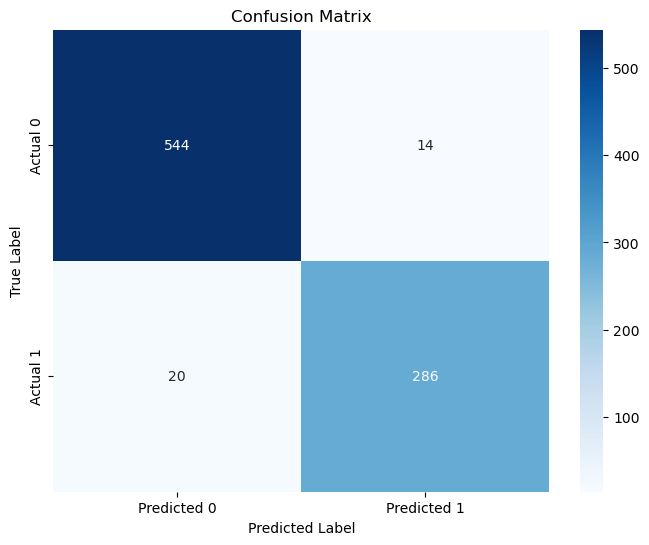

In [33]:
# ... existing code ...

import matplotlib.pyplot as plt
import seaborn as sns

# Plot Confusion Matrix
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# ... existing code ...

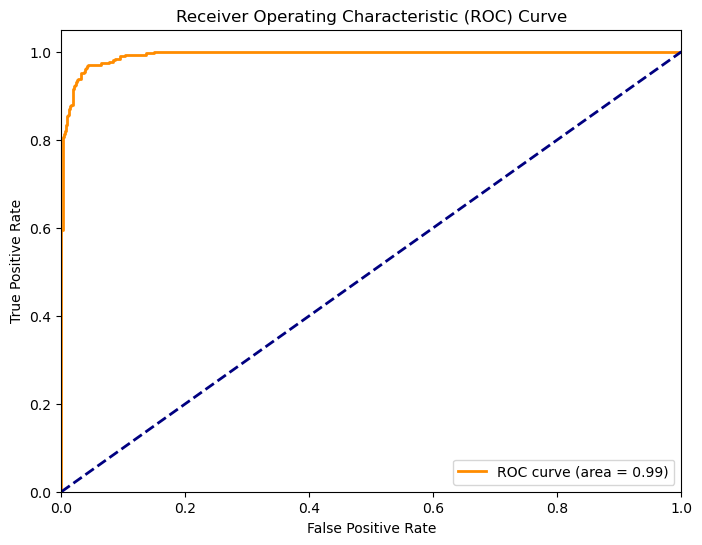

In [34]:
# ... existing code ...

from sklearn.metrics import roc_curve, roc_auc_score

# Get probability predictions for the positive class (class 1)
# Make sure your model has a predict_proba method
if hasattr(model, 'predict_proba'):
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()
else:
    print("Model does not have 'predict_proba' method, cannot plot ROC curve.")

# ... existing code ...

In [35]:
# ... existing code ...

import joblib
import os

# Asumsikan 'model' adalah objek model yang telah Anda latih (misalnya, RandomForestClassifier)
# Pastikan Anda telah melatih model sebelum mengekspornya

# Tentukan jalur untuk menyimpan model
# Disarankan untuk menyimpan model di folder 'models' dalam struktur proyek Anda
model_dir = 'models'
model_filename = 'random_forest_model.joblib'
model_path = os.path.join(model_dir, model_filename)

# Buat direktori 'models' jika belum ada
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

# Simpan model ke disk
joblib.dump(model, model_path)
print(f"Model berhasil diekspor ke: {model_path}")

# ... existing code ...

# Untuk memuat kembali model di sesi atau skrip lain:
# loaded_model = joblib.load(model_path)
# print("Model berhasil dimuat kembali.")

# Anda sekarang dapat menggunakan loaded_model untuk membuat prediksi
# Misalnya: loaded_model.predict(new_data)

Model berhasil diekspor ke: models\random_forest_model.joblib
